Epoch [10/100], Loss: 0.3352
Epoch [20/100], Loss: 0.1747
Epoch [30/100], Loss: 0.1191
Epoch [40/100], Loss: 0.0930
Epoch [50/100], Loss: 0.0730
Epoch [60/100], Loss: 0.1055
Epoch [70/100], Loss: 0.0737
Epoch [80/100], Loss: 0.0790
Epoch [90/100], Loss: 0.0852
Epoch [100/100], Loss: 0.0582
Accuracy: 100.00%

分类报告:
                 precision    recall  f1-score   support

    Iris_setosa       1.00      1.00      1.00        10
Iris_versicolor       1.00      1.00      1.00        10
 Iris_virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



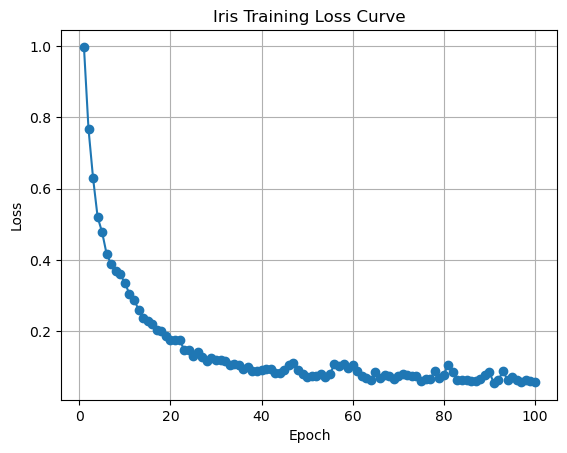

In [1]:
import sys
import os
sys.path.append(os.getcwd())

# 1. 导入模块
from data.iris_data import load_data
from models.fc_net import IrisNet
from train.train_model import train_model
from yest.test_model import test_model
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import classification_report

# 2. 加载数据
train_loader, test_loader = load_data()

# 3. 初始化模型
model = IrisNet()

# 4. 训练模型（返回模型和 loss_list）
model, loss_list = train_model(model, train_loader)

# 5. 测试模型（原函数）
test_model(model, test_loader)

# 6. 收集预测结果以生成分类报告
model.eval()  # 设置为评估模式
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# 获取标准鸢尾花三类类别名称
target_names = ['Iris_setosa', 'Iris_versicolor', 'Iris_virginica']

# 输出分类报告
print("\n分类报告:")
print(classification_report(y_true, y_pred, target_names=target_names))

# 7. 绘制 Loss 曲线
plt.plot(range(1, len(loss_list)+1), loss_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Iris Training Loss Curve")
plt.grid(True)
plt.show()